In [1]:
import numpy as np
from scipy import ndimage
from scipy.ndimage.filters import laplace as laplace
import matplotlib.pyplot as plt
%matplotlib inline

def gauss(x, y, mux, muy, sigmax, sigmay):
    sigma2 = sigmax*sigmay
    return 1.0/np.sqrt(2*np.pi*sigma2) * np.exp( -0.5*(x-mux)**2/(sigmax**2) - 0.5*(y-muy)**2/(sigmay**2) )



In [38]:
pos = np.fromfile(open('/Users/timrudge/Code/InfoTracking/pos.np','rt'), sep=',')
mxll = np.fromfile(open('/Users/timrudge/Code/InfoTracking/mxll.np','rt'), sep=',')
ll = np.fromfile(open('/Users/timrudge/Code/InfoTracking/ll.np','rt'), sep=',')
llself = np.fromfile(open('/Users/timrudge/Code/InfoTracking/llself.np','rt'), sep=',')
roi1 = np.fromfile(open('/Users/timrudge/Code/InfoTracking/roi1.np','rt'), sep=',')
roi2 = np.fromfile(open('/Users/timrudge/Code/InfoTracking/roi2.np','rt'), sep=',')
roi2_shifted = np.fromfile(open('/Users/timrudge/Code/InfoTracking/roi2_shifted.np','rt'), sep=',')


2001


/Users/timrudge/anaconda2/envs/cellmodeller/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  
/Users/timrudge/anaconda2/envs/cellmodeller/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/timrudge/anaconda2/envs/cellmodeller/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # Remove the CWD from sys.path while we load stuff.
/Users/timrudge/anaconda2/envs/cellmodeller/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()
/Users/timrudge/anaconda2/envs/cellmod

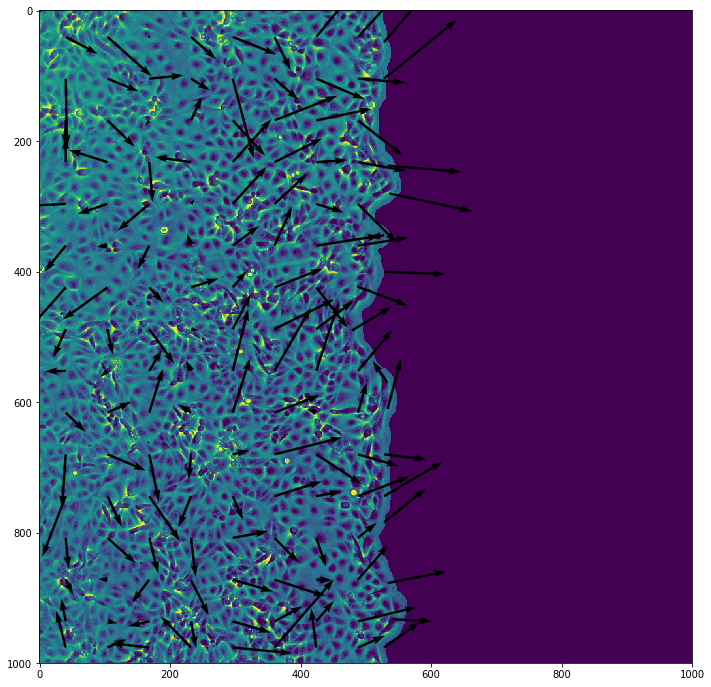

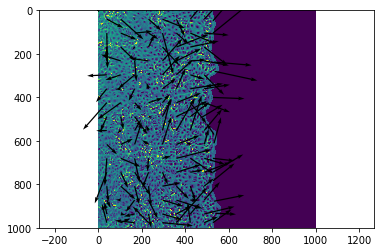

In [3]:
piv = np.genfromtxt(open('/Users/timrudge/AndreaRavasioData/PIV roi velocity text/OVCA429_20160414_06_%02d.txt'%20), delimiter=',')
print len(piv)
pivgridvel = np.zeros((1000/64+1,1000/64+1,2))
pivgridpos = np.zeros((1000/64+1,1000/64+1,2))
count = np.zeros((1000/64+1,1000/64+1))
for i in range(len(piv)):
    idxx,idxy = (piv[i,0]-8)/64, (piv[i,1]-8)/64
    count[idxx,idxy] += 1
    pivgridpos[idxx,idxy,0] += piv[i,0]
    pivgridpos[idxx,idxy,1] += piv[i,1]
    pivgridvel[idxx,idxy,0] += piv[i,2]
    pivgridvel[idxx,idxy,1] += piv[i,3]
    
pivgridpos[:,:,0] = pivgridpos[:,:,0]/count
pivgridpos[:,:,1] = pivgridpos[:,:,1]/count
pivgridvel[:,:,0] = pivgridvel[:,:,0]/count
pivgridvel[:,:,1] = pivgridvel[:,:,1]/count
pivgridpos[np.isnan(pivgridpos)] = 0
pivgridvel[np.isnan(pivgridvel)] = 0

plt.figure(figsize=(12,12))
im = plt.imread('/Users/timrudge/AndreaRavasioData/masked image/%02d.tif'%20).astype(np.float32)
plt.imshow(im)
plt.quiver(pivgridpos[:,:,0],pivgridpos[:,:,1], pivgridvel[:,:,0], pivgridvel[:,:,1])

plt.figure()
plt.axis('equal')
plt.quiver(pivgridpos[:,:,0],pivgridpos[:,:,1], pivgridvel[:,:,0], pivgridvel[:,:,1])
plt.imshow(im)
#plt.quiver(piv[:,0], piv[:,1], piv[:,2], piv[:,3])


In [41]:
print pos.shape
print ll.shape
print roi1.shape
np.real(21316/2/2)

(21316,)
(2398050,)
(43655168,)


array(5329)

In [42]:
gx,gy = 73,73
vv = 15
wx,wy = 64,64
nt = 2

x = np.arange(-vv/2,vv/2)
vy,vx = np.meshgrid(x,x)

pos = pos.reshape((gx,gy,nt,2))
mxll = mxll.reshape((gx,gy,nt))
ll = ll.reshape((gx,gy,nt,vv,vv))
llself = llself.reshape((gx,gy,nt,vv,vv))
roi1 = roi1.reshape((gx,gy,nt,wx,wy))
roi2 = roi2.reshape((gx,gy,nt,wx,wy))
roi2_shifted = roi2_shifted.reshape((gx,gy,nt,wx,wy))

[[ 456.          488.        ]
 [ 455.33272693  487.69541551]]


IndexError: index 28 is out of bounds for axis 0 with size 16

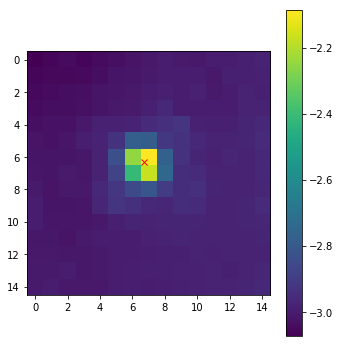

In [46]:
ix,iy,it = 28,30,-1

print pos[ix,iy,:,:]
#print pos[ix,iy,it-1,:]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
H = ll[ix,iy,it,:,:]
plt.imshow(H)


plt.colorbar()
plt.plot(pos[ix,iy,it,1]-pos[ix,iy,it-1,1]+7, pos[ix,iy,it,0]-pos[ix,iy,it-1,0]+7, 'rx')
plt.plot(pivgridvel[ix,iy,0]/15+7, pivgridvel[ix,iy,1]/15+7, 'go')

#dHdy,dHdx = np.gradient(H)
#plt.quiver(-dHdx,dHdy)



plt.subplot(1,2,2)
Hself = -llself[ix,iy,it,:,:]
eH = np.exp(H-Hself)
plt.imshow(eH/np.sum(eH))
plt.colorbar()

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(roi1[ix,iy,it,:,:], cmap='gray')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(roi2[ix,iy,it,:,:], cmap='gray')
plt.colorbar()


plt.subplot(2,2,3)
plt.imshow((roi2_shifted)[ix,iy,it,:,:], cmap='gray')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow((roi2_shifted-roi1)[ix,iy,it,:,:], cmap='gray')
plt.colorbar()


(array([ 985.,    2.,    2.,    6.,   11.,   21.,   17.,   21.,   11.,    4.]),
 array([ 0.        ,  0.09973147,  0.19946294,  0.29919442,  0.39892589,
         0.49865736,  0.59838883,  0.6981203 ,  0.79785177,  0.89758325,
         0.99731472]),
 <a list of 10 Patch objects>)

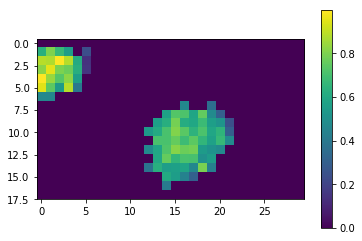

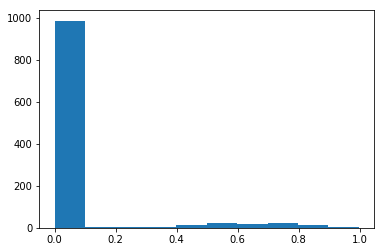

In [34]:

plt.figure()
#plt.plot(-mxll.reshape((gx*gy,nt)).transpose())
plt.imshow(-mxll[:,:,-1])
plt.colorbar()

plt.figure()
plt.hist(-mxll.reshape((gx*gy*nt)))

4.937127648
30.67175


/Users/timrudge/anaconda2/envs/cellmodeller/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


(-0.5, 1251.625, 1251.625, -0.5)

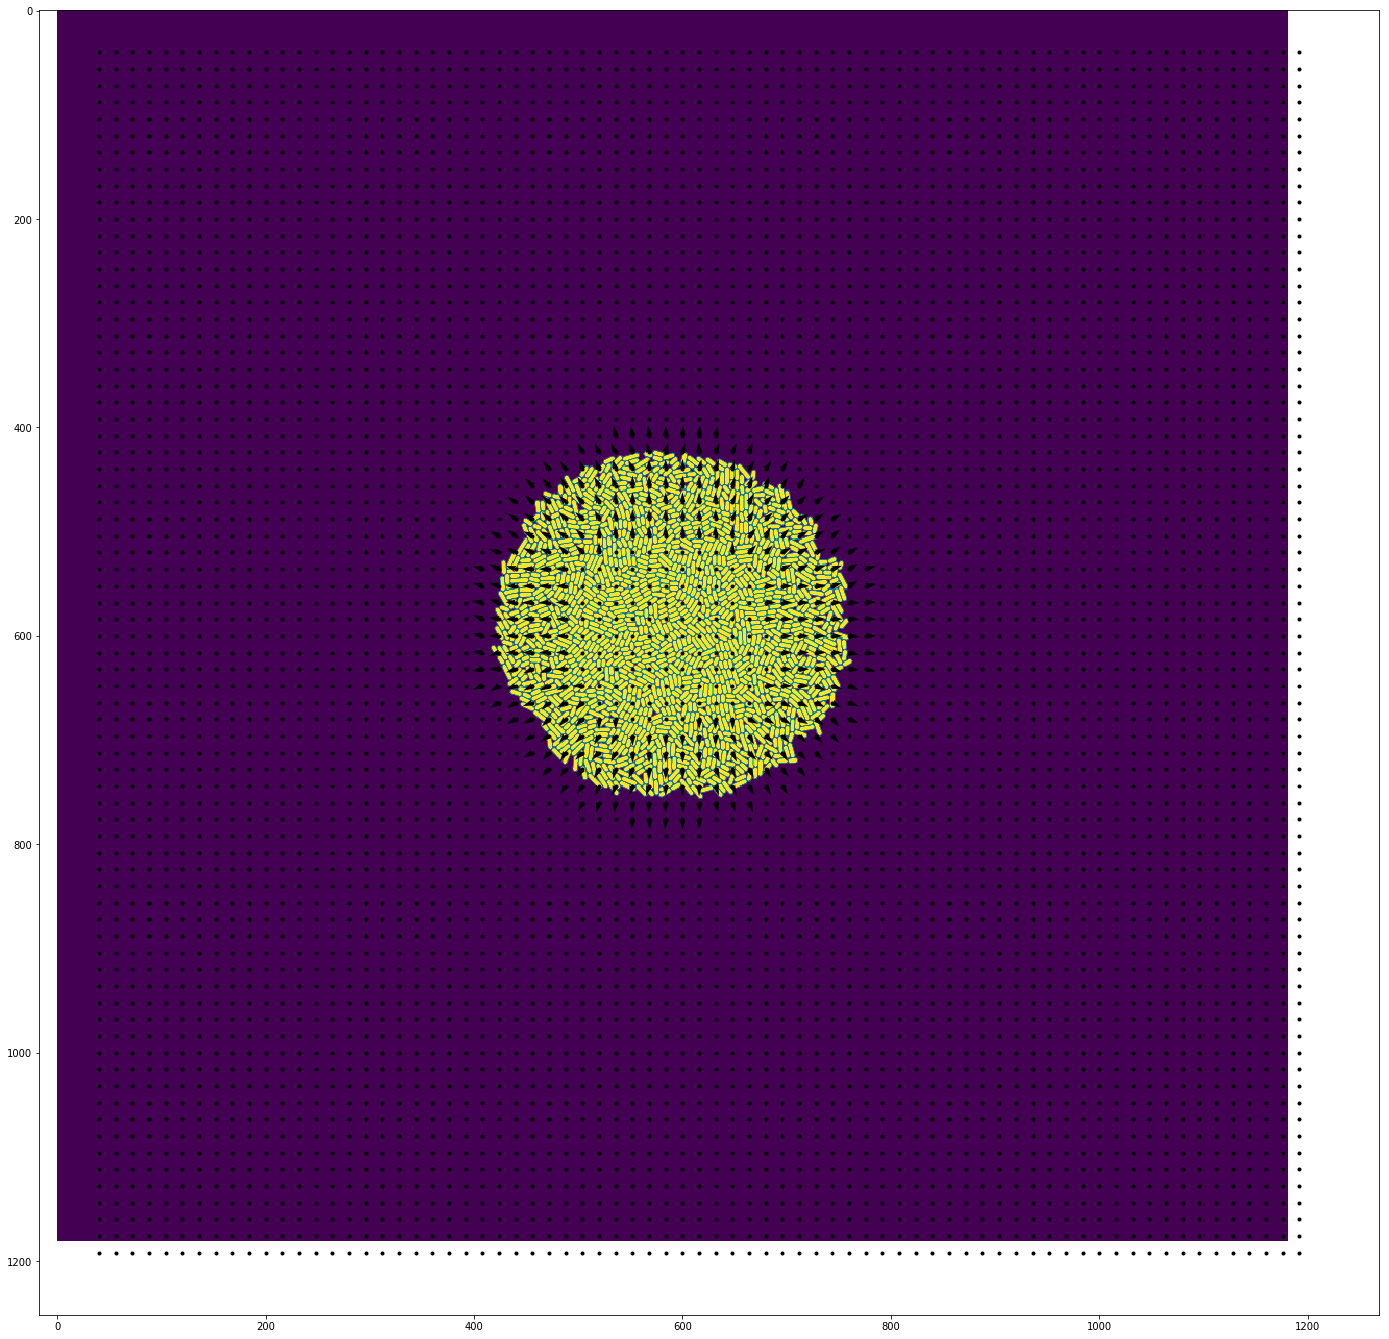

In [53]:
plt.figure(figsize=(24,24))
p = np.reshape(pos, (gx*gy,nt,2))
vel = pos[:,:,-1,:] - pos[:,:,-2,:]
velmag = np.sqrt(np.sum(vel*vel,axis=2))
print np.max(vel)
swx=64
plt.quiver(swx/2+pos[:,:,0,1], swx/2+pos[:,:,0,0], vel[:,:,1]/velmag, -vel[:,:,0]/velmag)
plt.plot(swx/2+pos[:,:,0,1], swx/2+pos[:,:,0,0], 'k.')

print np.max(pivgridvel)
pivvelmag = 4 #np.sqrt(np.sum(pivgridvel*pivgridvel,axis=2))
#plt.quiver(pivgridpos[:,:,0],pivgridpos[:,:,1], pivgridvel[:,:,0]/pivvelmag, pivgridvel[:,:,1]/pivvelmag, color='r')
#plt.plot(pivgridpos[:,:,0], pivgridpos[:,:,1], 'rx')
#plt.quiver(piv[:,0], piv[:,1], piv[:,2]/4, piv[:,3]/4, color='r')
#im1 = plt.imread('/Users/timrudge/AndreaRavasioData/masked image/%02d.tif'%10).astype(np.float32)
#im2 = plt.imread('/Users/timrudge/AndreaRavasioData/masked image/%02d.tif'%20).astype(np.float32)
#im2 = plt.imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/Frame0000_regStep%04d.tif'%150).astype(np.float32)
im2 = plt.imread('/Users/timrudge/cellmodeller/data/testing-18-06-25-01-09/step-%05d.png'%150).astype(np.float32)

plt.imshow(im2)
plt.axis('equal')

#err = np.sqrt(np.mean((vel-pivgridvel[:-1,:-1,:]/3.5)**2,axis=2))
#err[np.isnan(err)]=0
#plt.figure()
#plt.hist(err[err>0].ravel())
#plt.plot(vel[:,:,1], pivgridvel[:-1,:-1,0], '.')

#plt.figure()
#ll = ll.reshape((17*29,50,15,15))
#plt.imshow(ll[400,1,:,:])
